# <span style="color:red">Resturant reviews using K-NN:</span>

<img src="https://static.javatpoint.com/tutorial/machine-learning/images/k-nearest-neighbor-algorithm-for-machine-learning2.png" />

## <span style="color:green">1.Importing requires libraries:</span>

In [3]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import re   
import nltk 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
from sklearn.feature_extraction.text import TfidfTransformer
tf=TfidfTransformer(smooth_idf=False)

## <span style="color:green">2.Reading the dataset:</span>

In [4]:
data=pd.read_csv("Restaurant_Reviews.tsv",delimiter='\t',quoting=3)
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


#### The data consists of two columns. The review column is the text's left as a review by the customer . 
#### The liked column is the label which determines wheather the review is good or bad (1 for good and 0 for bad )

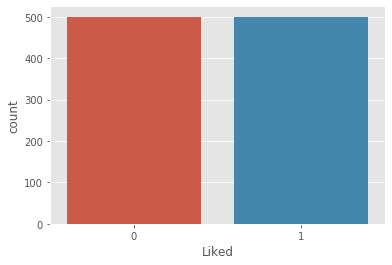

In [5]:
sns.countplot(x="Liked",data=data)

#### From the above countplot we can analyze that the data is balanced one . 
#### An almost equal number of likes and dislikes. 

## <span style="color:green">3. Cleaning data  (Pre-processing):</span>

In [6]:
corpus=[]
for i in range(1000):

    review=re.sub('[^a-zA-Z]'," ", data["Review"][i])     # Keeps only the alphabetic charcters and removes all other characters
    review=review.lower()                    # Converting all words to lower case so that "good" and "Good" should'nt be confused as two different words
    review=review.split()                        # splitting each word of the review into a list of words
    review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))] # stemming the words to its root form and same time removing all the stopwords
    review=" ".join(review)                  # joining each word to form back one cleaned single review
    corpus.append(review)                    # appending each sentences back to form a list of cleaned review

#####    can generate a word cloud for visualization of words with highest frequency

In [7]:
text=" ".join(w for w in corpus)

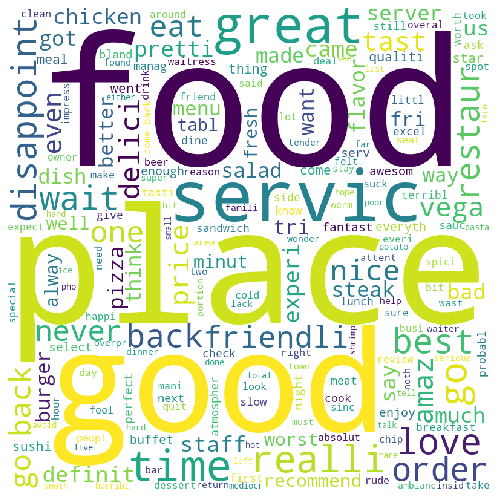

In [33]:
'''import sys
!pip install wordcloud'''
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 800, height = 800,background_color ='white',stopwords = STOPWORDS, min_font_size = 10).generate(text) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 7), facecolor = None) 
plt.imshow(wordcloud,cmap="spring") 
plt.axis("off") 
plt.tight_layout(pad = 1) 
plt.show() 

## <span style="color:green">4. Bag of Words:</span>

In [155]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()   #max_feature to use when too much words

In [156]:
X=cv.fit_transform(corpus).toarray()

In [157]:
X.shape

(1000, 1565)

## <span style="color:green">5.Training model:</span>

In [158]:
Y=data.iloc[:,1]     # traget variable

In [159]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.40,random_state=42, stratify=Y)

In [160]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [161]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, Y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, Y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, Y_test) 

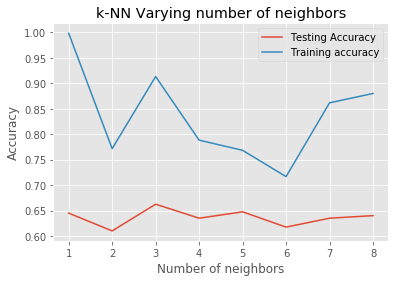

In [162]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [163]:
knn = KNeighborsClassifier(n_neighbors=3)#Initially we took '6' after hyperparameter tuning '3'

In [164]:
#Fit the model
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [174]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test,Y_test)

0.6625

In [175]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

In [176]:
#let us get the predictions using the classifier we had fit above
Y_pred = knn.predict(X_test)

In [177]:
confusion_matrix(Y_test,Y_pred)

array([[135,  65],
       [ 70, 130]], dtype=int64)

In [178]:
cm=pd.crosstab(Y_test, Y_pred, rownames=['Test'], colnames=['Predicted'])
cm

Predicted,0,1
Test,,
0,135,65
1,70,130


In [180]:
Y_pred_proba = knn.predict_proba(X_test)[:,1]

In [181]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_proba)

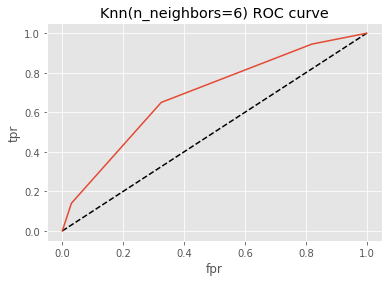

In [182]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=6) ROC curve')
plt.show()

In [183]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,Y_pred_proba)

0.6884375

## <span style="color:green">6.Hyperparamater tuning:</span>
### Initially we took n_neighbors as '6',after hyper tuning n_neighbors is '3'
### Hence n_neighbors as '3' gives better results
###### Note: Dont run from there again,it takes lot of time

In [184]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [105]:
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}

In [106]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,Y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [107]:
knn_cv.best_score_

0.683

In [108]:
knn_cv.best_params_

{'n_neighbors': 3}

## <span style="color:green">7.Results:</span>

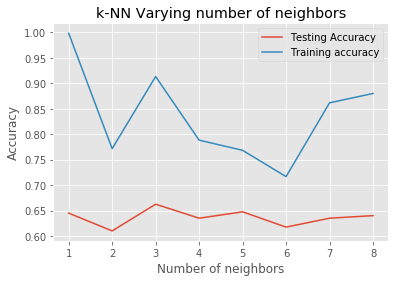

In [185]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [186]:
cm=pd.crosstab(Y_test, Y_pred, rownames=['Test'], colnames=['Predicted'])
cm

Predicted,0,1
Test,,
0,135,65
1,70,130


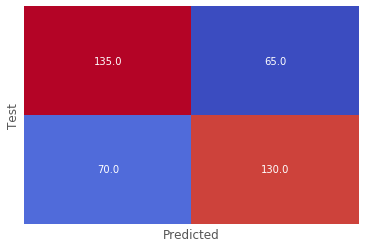

In [187]:
sns.heatmap(cm,cmap='coolwarm',annot=True,fmt=".1f",cbar=False,xticklabels=False,yticklabels=False)
plt.show()

In [188]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test,Y_test)

0.6625

In [189]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.66      0.68      0.67       200
           1       0.67      0.65      0.66       200

   micro avg       0.66      0.66      0.66       400
   macro avg       0.66      0.66      0.66       400
weighted avg       0.66      0.66      0.66       400



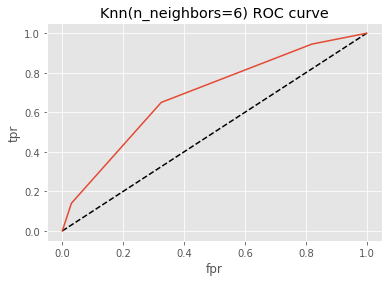

In [190]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=6) ROC curve')
plt.show()

In [191]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,Y_pred_proba)

0.6884375